In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from collections import Counter



In [16]:
df = pd.read_csv('data/pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [17]:
df.shape

(17898, 9)

In [18]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [19]:
# Rename columns
df.columns=['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [20]:
df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [22]:
# Class Imbalance
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [23]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [24]:
df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


<Axes: >

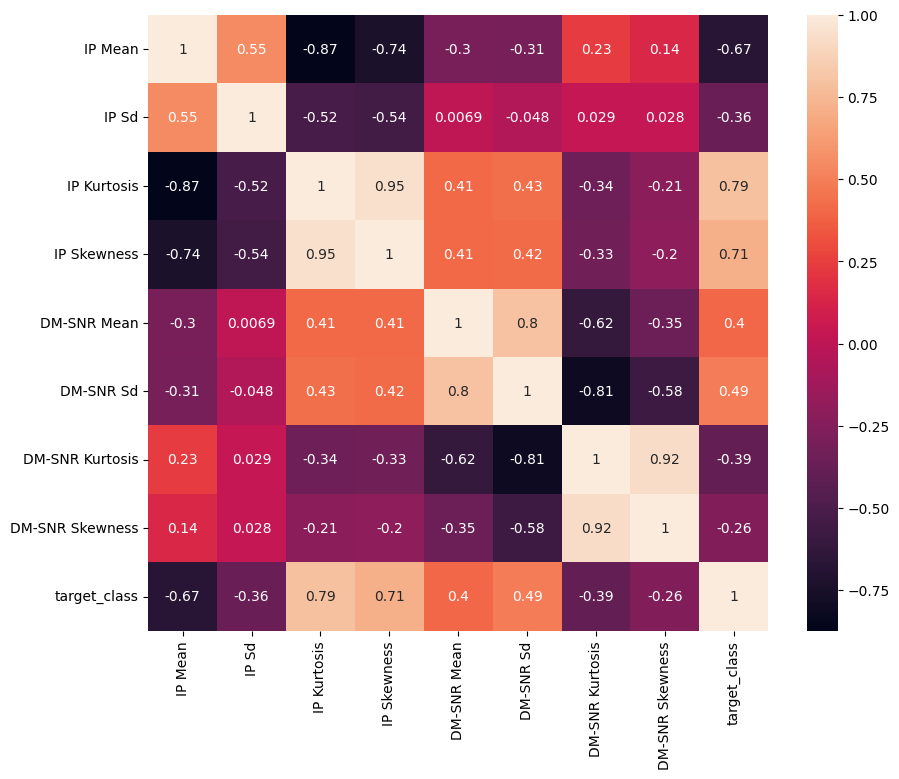

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True)

In [26]:
X=df.drop(columns=['target_class'])
y=df['target_class']

print("Original class distribution:")
print(Counter(y))

Original class distribution:
Counter({0: 16259, 1: 1639})


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [42]:
len(y_train)

14318

In [52]:
X_train.shape

(14318, 8)

In [41]:
newdata = (192 - X_train['IP Mean'].mean())/(X_train['IP Mean'].std())
newdata

3.1637793717524794

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-2.67946778, -1.79478007,  2.8595421 , ...,  2.34299093,
        -1.70589651, -0.99075829],
       [ 0.18953379, -0.66026852, -0.27355262, ..., -0.47731643,
         0.26237997, -0.03944414],
       [ 0.68546338,  0.30925141, -0.51573674, ..., -0.49890602,
         0.31301109,  0.08889377],
       ...,
       [ 0.14952961, -0.24472617, -0.03814834, ..., -0.54289561,
         0.34029374,  0.16147868],
       [-0.41541481, -0.04221465, -0.0753563 , ..., -0.44293414,
         0.19543697, -0.0560525 ],
       [-1.19687038,  0.23875892,  1.06154722, ...,  2.02475585,
        -1.43672236, -0.96586768]])

In [46]:
smote = SMOTE(random_state=42)

print("Before SMOTE:", Counter(y_train))

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 13007, 1: 1311})
After SMOTE: Counter({1: 13007, 0: 13007})


In [47]:
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_smote, y_train_smote)

SVC(probability=True, random_state=42)

In [48]:
y_pred = svm_model.predict(X_test_scaled)

In [49]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

,y_test,y_pred
4425,0,0
1,0,0
16392,0,0
13969,0,0
14271,0,0
...,...,...
9878,0,0
5540,0,0
10195,0,0
1339,0,0


In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.970391061452514
Recall Score:  0.9146341463414634
Precision Score:  0.7936507936507936
F1 Score:  0.8498583569405099
Confusion Matrix: 
 [[3174   78]
 [  28  300]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3252
           1       0.79      0.91      0.85       328

    accuracy                           0.97      3580
   macro avg       0.89      0.95      0.92      3580
weighted avg       0.97      0.97      0.97      3580



<Axes: >

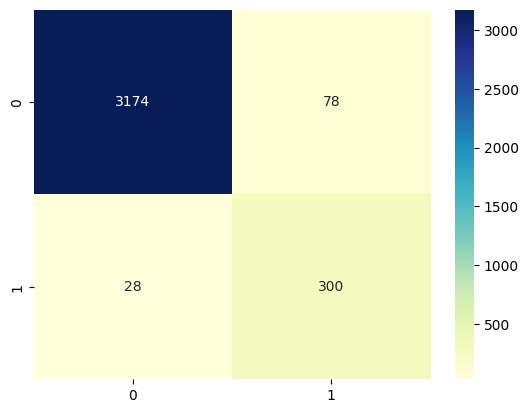

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [26]:
# simpler method (not recommended for research):
#  This duplicates data → higher risk of overfitting.

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


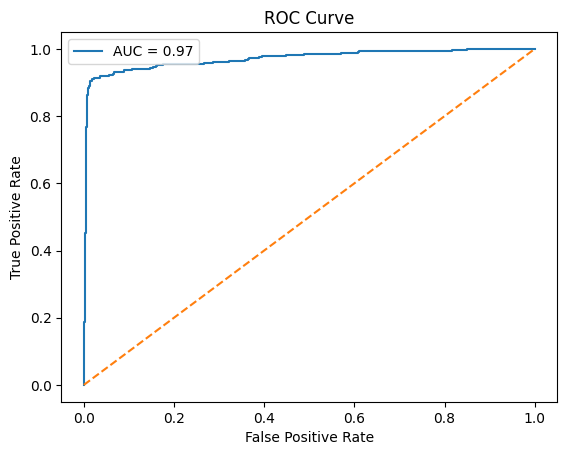

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
